In [1]:
# Arpan Purkait
# ISI Kolkata - Data Science Internship 2025

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("GWB1223.csv")
print(df.head())
grids = df[['Latitude', 'Longitude']].drop_duplicates()
print("Total grids: ",len(grids))
df = df.loc[:,~df.columns.duplicated()] # Duplicated Data cleaning
df['Date'] = pd.to_datetime(df['Date']) # Date time format
print("Missing values: \n",df.isnull().sum())

         Date  Latitude  Longitude   Tmax   Tmin  Rain
0  2012-01-01      21.5       85.5  28.45  17.24   0.0
1  2012-01-02      21.5       85.5  27.20  17.68   0.0
2  2012-01-03      21.5       85.5  27.56  17.51   0.0
3  2012-01-04      21.5       85.5  25.63  17.69   0.0
4  2012-01-05      21.5       85.5  27.87  18.00   0.0
Total grids:  20
Missing values: 
 Date         0
Latitude     0
Longitude    0
Tmax         0
Tmin         0
Rain         0
dtype: int64


In [18]:
print(df['Tmax'].min())
print(df['Tmax'].max(),"\n")
print(df['Tmin'].min())
print(df['Tmin'].max(),"\n")
print(df['Rain'].min())
print(df['Rain'].max(),"\n")

14.9
44.9 

2.35
30.02 

-999.0
244.2213 



In [48]:
df['Normal_max'] = ((df['Tmax'] - ((14.9+2.35)/2))/(((44.9+30.02)/2) - ((14.9+2.35)/2)))
df['Normal_min'] = ((df['Tmin'] - ((14.9+2.35)/2))/(((44.9+30.02)/2) - ((14.9+2.35)/2)))
print(df.head())

        Date  Latitude  Longitude   Tmax   Tmin  Rain  Normal_max  Normal_min
0 2012-01-01      21.5       85.5  28.45  17.24   0.0    0.687533    0.298769
1 2012-01-02      21.5       85.5  27.20  17.68   0.0    0.644182    0.314028
2 2012-01-03      21.5       85.5  27.56  17.51   0.0    0.656667    0.308132
3 2012-01-04      21.5       85.5  25.63  17.69   0.0    0.589735    0.314375
4 2012-01-05      21.5       85.5  27.87  18.00   0.0    0.667418    0.325126


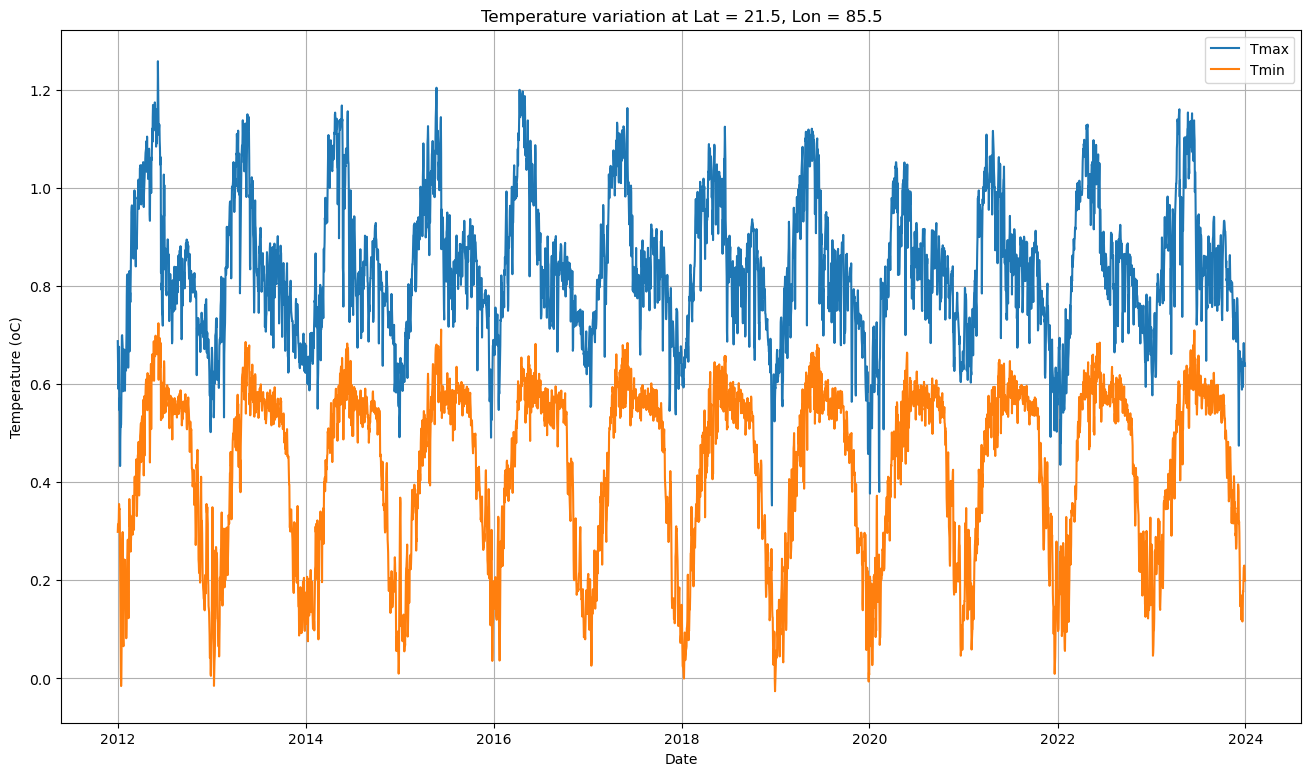

In [50]:
lat0 = df['Latitude'].iloc[0]
lon0 = df['Longitude'].iloc[0]
#print(lat0,lon0)
grid_df = df[(df['Latitude'] == lat0) & (df['Longitude'] == lon0)]
#print(grid_df.head())
plt.figure(figsize=(16,9))
plt.plot(grid_df['Date'],grid_df['Normal_max'],label='Tmax')
plt.plot(grid_df['Date'],grid_df['Normal_min'],label='Tmin')
plt.title(f"Temperature variation at Lat = {lat0}, Lon = {lon0}")
plt.xlabel('Date')
plt.ylabel('Temperature (oC)')
plt.legend()
plt.grid(True)
plt.show()
#plt.savefig("Temp_singleGrid.png",dpi=300)

In [ ]:
monthly_mean['Date'] = pd.to_datetime(monthly_mean['Date'])

# Extract year and month
monthly_mean['Year'] = monthly_mean['Date'].dt.year
monthly_mean['Month'] = monthly_mean['Date'].dt.month

vmin = min(monthly_mean['Tmax'].min(), monthly_mean['Tmin'].min())
vmax = max(monthly_mean['Tmax'].max(), monthly_mean['Tmin'].max())

# Pivot for Tmax
pivot_tmax = monthly_mean.pivot_table(index='Month', columns='Year', values='Tmax')
plt.figure(figsize=(14,6))
sns.heatmap(pivot_tmax, cmap='coolwarm', annot=False, linewidths=0.5, vmin=vmin, vmax=vmax)
plt.title('Monthly Avg Tmax Heatmap (Common Scale)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

# Pivot for Tmin
pivot_tmin = monthly_mean.pivot_table(index='Month', columns='Year', values='Tmin')
plt.figure(figsize=(14,6))
sns.heatmap(pivot_tmin, cmap='coolwarm', annot=False, linewidths=0.5, vmin=vmin, vmax=vmax)
plt.title('Monthly Avg Tmin Heatmap (Common Scale)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()